# UCLAIS Dev: EPL Prediction

We are proud to present you with the first challenge of the 2022-23 UCLAIS Dev Competition series: English Premier League prediction. You will be introduced to a variety of core concepts in machine learning and their implementation using `scikit-learn`. 

This Jupyter notebook will guide you through the various general stages involved in end-to-end machine learning projects, including data visualisation, data preprocessing, model selection, model training and model evaluation. Finally, you will get the chance to submit your results to [DOXA](https://doxaai.com/).

If you do not already have a DOXA account, you will want to [sign up](https://doxaai.com/sign-up) first before proceeding.


![title](https://ajira.anzimag.com/wp-content/uploads/2022/08/5-8.png)

**Background**: English Premier League, is a professional football (soccer) league established in 1992. The league, which comprises 20 clubs, superseded the first division of the English Football League (EFL) as the top level of football in England.

During a Premier League season, each club plays one home and one away match with every other team in the league (which means every team will play 38 matches for each season). A match victory gives the winning team three points in the standings, while a draw results in one point for each club.

The bottom three clubs of the Premier League are relegated (dropped), and the top three finishers of first-division (EFL Championship) teams of the EFL are promoted to the Premier League.

**Objective**: The main objective for this challenge is to predict the result of an EPL match given some prior information about the match

**Dataset**: EPL matches dating back from August 2003. The dataset is attained from [Foorball Data](https://www.football-data.co.uk/englandm.php)

## Machine Learning Workflow

![title](https://miro.medium.com/max/1400/0*V0GyOt3LoDVfY7y5.png)

As you already know, the machine learning process covers a wide set of steps. As you go through this notebook, try to keep in mind which stage are we dealing with at that moment and what we are trying to achieve. 

There are a lot of helpful resources online you can use, such as the excellent `scikit-learn` [documentation](https://scikit-learn.org/stable/getting_started.html). If you need some motivation, go to Kaggle, and search for any challenges/notebook that looks similar to the problem we are doing. For example, [NCAA Basketball](https://www.kaggle.com/datasets/ncaa/ncaa-basketball) and [International Football Matches](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?datasetId=4305&sortBy=voteCount).

## Installing and Importing Useful Packages

To get started, we will install a number of common machine learning packages.

In [1]:
# %pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Import relevant libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp

from pathlib import Path

# Import relevant sklearn classes/functions related to data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures, OneHotEncoder, LabelEncoder

# Import relevant sklearn classes related to machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import SVC, SVR, NuSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# Import relevant sklearn class/function related to evaluation
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay 

from scipy.optimize import minimize

%matplotlib ipympl

## Data Loading

In [3]:
# Let's download the dataset if we don't already have it!
if not os.path.exists("data"):
    os.makedirs("data", exist_ok=True)

    !curl https://raw.githubusercontent.com/DoxaAI/epl-getting-started/data/train.csv --output data/train.csv
    !curl https://raw.githubusercontent.com/DoxaAI/epl-getting-started/data/test.csv --output data/test.csv

In [4]:
# Import the training dataset
data_original = pd.read_csv("./data/train.csv")  # Change the path accordingly

# Import the testing dataset
data_test = pd.read_csv("./data/test.csv")  # Change the path accordingly

# We then make a copy of the training set that we can manipulate
# and process while leaving the original intact
data = data_original.copy()

## Data Understanding 

Before we start to train our Machine Learning model, it is important to have a look and understand first the dataset that we will be using. This will provide some insights onto which model, model hyperparameter, and loss function are suitable for the problem we are dealing with. 

In [5]:
# Let's see the first 5 entries of our dataset
data.head()

,date,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2003-08-16,Arsenal,Everton,2,1,H,1,0,H,M Halsey,...,5,7,8,15,6,9,1,3,1,1
1,2003-08-16,Fulham,Middlesbrough,3,2,H,1,1,D,G Poll,...,9,5,18,16,7,6,1,1,0,0
2,2003-08-16,Birmingham,Tottenham,1,0,H,1,0,H,R Styles,...,5,7,20,27,1,4,3,5,0,0
3,2003-08-16,Portsmouth,Aston Villa,2,1,H,1,0,H,G Barber,...,3,5,18,22,7,9,2,1,0,1
4,2003-08-16,Man United,Bolton,4,0,H,1,0,H,P Durkin,...,6,5,12,8,8,4,0,4,0,0


In [6]:
# View some statistical information about the features we have
data.describe()

,full_time_home_goals,full_time_away_goals,half_time_home_goals,half_time_away_goals,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
count,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,1.521116,1.160935,0.682353,0.513575,13.638914,10.856109,6.043137,4.769985,11.121719,11.567722,6.028808,4.754148,1.439367,1.742383,0.060935,0.084314
std,1.304606,1.150159,0.834198,0.729140,5.343723,4.681639,3.356067,2.829233,3.673440,3.828246,3.106825,2.726295,1.188846,1.269767,0.250323,0.289054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,27.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000


In [7]:
# View the size and shape of our training data
print(f"Shape: {data.shape}\n")

# Display the list of features we have
print(f"List of features: {data.columns}\n")

# Check for any missing values
print("Missing values: ")
print(data.isna().sum())

Shape: (6630, 22)

List of features: Index(['date', 'home_team', 'away_team', 'full_time_home_goals',
       'full_time_away_goals', 'full_time_result', 'half_time_home_goals',
       'half_time_away_goals', 'half_time_result', 'referee', 'home_shots',
       'away_shots', 'home_shots_on_target', 'away_shots_on_target',
       'home_fouls', 'away_fouls', 'home_corners', 'away_corners',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards'],
      dtype='object')

Missing values: 
date                    0
home_team               0
away_team               0
full_time_home_goals    0
full_time_away_goals    0
full_time_result        0
half_time_home_goals    0
half_time_away_goals    0
half_time_result        0
referee                 0
home_shots              0
away_shots              0
home_shots_on_target    0
away_shots_on_target    0
home_fouls              0
away_fouls              0
home_corners            0
away_corners            0
home_yello

From the dataframe and simple analysis above, there are several things we can observe:

- There are 21 features (excluding `full_time_result`, which we are trying to predict) and 6630 samples
- The features in our dataset involve both numerical and categorical value
- The range of the numerical features in our dataset does not varies wildly
- There are no missing data values in our dataset
- We are dealing with a multi-class classification problem, where the output is either 'H', 'D', or 'A'

Now, let's see whether we are dealing with imbalanced classification or not

In [8]:
# Find the total number of matches that result in either 'H', 'D', or 'A'
home_win = len(data[data["full_time_result"] == 'H'])
draw = len(data[data["full_time_result"] == 'D'])
away_win = len(data[data["full_time_result"] == 'A'])

print(f"Number of matches that resulted in a win by home team: {home_win}")
print(f"Number of matches that resulted in a draw: {draw}")
print(f"Number of matches that resulted in a win by away team: {away_win}")

Number of matches that resulted in a win by home team: 3026
Number of matches that resulted in a draw: 1651
Number of matches that resulted in a win by away team: 1953


Yeah - it seems that we are dealing with an imbalanced classification problem where the result is skewed towards the home team winning. However, it's not too bad as compared to the brain stroke prediction challenge though. 

Now, let's investigate the test set that we are provided

In [9]:
# View the first 5 entries of our test set
data_test.head()

,date,home_team,away_team,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2017-12-13,West Ham,Arsenal,0,0,D,J Moss,6,22,0,3,9,9,1,7,1,0,0,0
1,2004-02-21,Man United,Leeds,0,0,D,M Halsey,24,7,7,3,12,17,12,7,1,2,0,0
2,2009-02-23,Hull,Tottenham,1,1,D,L Probert,12,9,4,6,11,7,11,13,2,1,0,0
3,2017-12-03,Bournemouth,Southampton,1,0,H,J Moss,16,15,5,4,6,12,5,4,2,1,0,0
4,2014-01-18,Liverpool,Aston Villa,1,2,A,J Moss,14,12,6,3,14,18,2,3,1,4,0,0


In [10]:
print(len(data_test.columns))
data_test.columns

19


Index(['date', 'home_team', 'away_team', 'half_time_home_goals',
       'half_time_away_goals', 'half_time_result', 'referee', 'home_shots',
       'away_shots', 'home_shots_on_target', 'away_shots_on_target',
       'home_fouls', 'away_fouls', 'home_corners', 'away_corners',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards'],
      dtype='object')

Oopps! It seems that the feature for our testing set does not match with the feature that we have for our training data.

We are now dealing with a problem/challenge with a different nature compared to the previous challenges we have in the past. Then, the question is how can we approach this problem? The simplest way of resolving this is by removing the feature that does not exist in both in the training and testing set

## Data Visualisation

In general, we know (although we cannot be certain) that team with a high shots on target will have a higher chance of winning.

But, is this true? And does it apply to this dataset? We can verify this correlation by producing a plot of the number of shots made against the chance of winning.

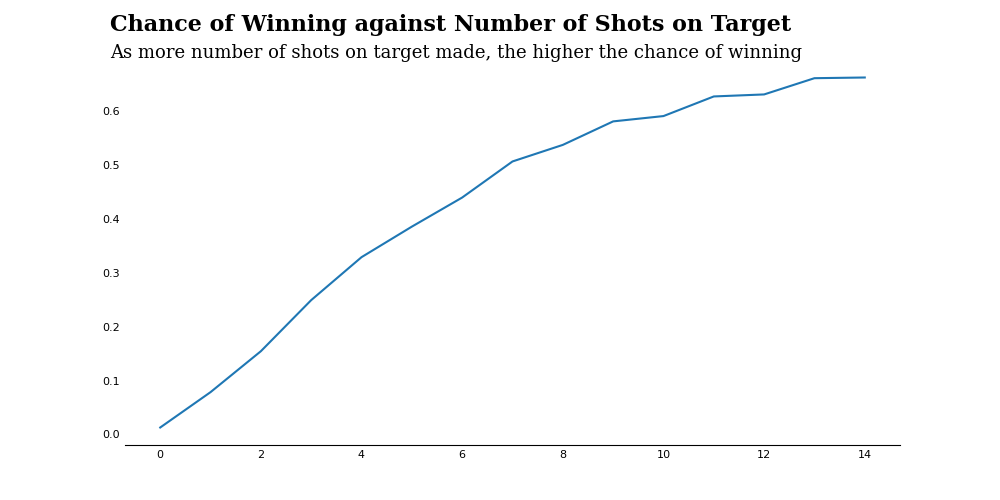

In [11]:
fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot()

# Calculate the chance of a team winning the match as a function of number of shots made
rate = []
for i in range(15):
    totalMatch_home = data[data["home_shots_on_target"] == i]
    totalMatch_away = data[data["away_shots_on_target"] == i]

    winMatch_home = totalMatch_home[totalMatch_home["full_time_result"] == "H"]
    winMatch_away = totalMatch_away[totalMatch_away["full_time_result"] == "A"]

    win_rate = (len(winMatch_home) + len(winMatch_away))/(len(totalMatch_home) + len(totalMatch_away))

    rate.append(win_rate)

# Draw a lineplot
sns.lineplot(data=rate, ax=ax0)

# Remove the top, right, and left surrounding line for aesthetic purposes
for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

# Adjust the tick appearance for aesthetic purposes
ax0.tick_params(axis="both", which="major", labelsize=8)
ax0.tick_params(axis="both", which="both", length=0)

# Add some text on the figure
ax0.text(
    -1,
    0.75,
    "Chance of Winning against Number of Shots on Target",
    fontsize=16,
    fontfamily="serif",
    fontweight="bold",
)
ax0.text(
    -1,
    0.7,
    "As more number of shots on target made, the higher the chance of winning",
    fontsize=13,
    fontfamily="serif",
)

plt.show()


Yep - as expected, the higher the number of shots on target made, the higher the chance of a team winning the match. From this, it suggests that we should include the feature on number of shoots on target made by both home and away team as the input for our both training and testing set

## Data Preprocessing


Okay, we have investigate our data, clean any missing data (which we don't really have), and do some visualisation. The next step for us is to prepare our data before we start to train it.




### Feature Encoding

For this step, we will encode any categorical feature that we have (`home_team`, `away_team`, `referee`, `half_time_result`) into numerical feature which will allow our machine learning model to be trained.

In [12]:
# Encode categorical features using CategoricalEncoder() 
enc = OrdinalEncoder()
data[["home_team", "away_team", "referee", "half_time_result"]] = enc.fit_transform(
    data[["home_team", "away_team", "referee", "half_time_result"]]
)

For our target, which is `full_time_result`, we will be using LabelEncoder() since it is the one recommended in Scikit-learn documentation

In [13]:
data["full_time_result"]

0       H
1       H
2       H
3       H
4       H
       ..
6625    H
6626    H
6627    H
6628    A
6629    A
Name: full_time_result, Length: 6630, dtype: object

In [14]:
# Encode target features using LabelEncoder() 
target_enc = LabelEncoder()
data["full_time_result"] = target_enc.fit_transform(
    data["full_time_result"]
)

For the `date`, the simplest way to deal with it is just to drop it

In [15]:
data.drop(columns=["date"], inplace=True)

In [16]:
# Verify that our input features has been encoded
data.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,0.0,15.0,2,1,2,1,0,2.0,32.0,11,...,5,7,8,15,6,9,1,3,1,1
1,16.0,24.0,3,2,2,1,1,1.0,16.0,17,...,9,5,18,16,7,6,1,1,0,0
2,2.0,36.0,1,0,2,1,0,2.0,53.0,10,...,5,7,20,27,1,4,3,5,0,0
3,28.0,1.0,2,1,2,1,0,2.0,15.0,4,...,3,5,18,22,7,9,2,1,0,1
4,23.0,5.0,4,0,2,1,0,2.0,45.0,13,...,6,5,12,8,8,4,0,4,0,0


### Feature Standardization

For standardising the range of our datasets, since the range of the numerical feature that we have does not vary that much, it does not matter very much for our model. So we can go both ways either doing it or not doing it.

In [17]:
# Add code on data standardization if you want

### Feature Engineering

Remember that the feature we have in the training set does not agree with the testing set, hence we need to do something with it.

And the easiest thing to do is just to drop the feature that are not in the testing set

In [18]:
data.drop(columns=["full_time_home_goals", "full_time_away_goals"], inplace=True)

In [19]:
data.head()

,home_team,away_team,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,0.0,15.0,2,1,0,2.0,32.0,11,13,5,7,8,15,6,9,1,3,1,1
1,16.0,24.0,2,1,1,1.0,16.0,17,8,9,5,18,16,7,6,1,1,0,0
2,2.0,36.0,2,1,0,2.0,53.0,10,15,5,7,20,27,1,4,3,5,0,0
3,28.0,1.0,2,1,0,2.0,15.0,4,9,3,5,18,22,7,9,2,1,0,1
4,23.0,5.0,2,1,0,2.0,45.0,13,15,6,5,12,8,8,4,0,4,0,0


### Final Preprocessing Step
Now that our data has been standardised and all our features are numerical, we are very close to training our first machine learning model.

All that is left to do is the following:

1. **Separate the input features and the output label**: this is an important requirement when training our dataset - we don't want to train our `scikit-learn` models on the data we are trying to predict!

2. **Split our data into training and test sets**: the training set is the dataset on which our models will be trained. After training our models, we then test them on our newly created test set.

We will use the **empirical error** from evaluating our models on the test set as a proxy for the **generalisation error**: a measure of how accurately an algorithm can predict outcomes for unseen data (which is what we are trying to do eventually!). It will also provide us with a useful tool for comparing the different models we have trained so that we can decide which model to use for our submission to DOXA. Bam!

In [20]:
# Separate our data into X, which contains all the features in our dataset and y, which contains only the output/label (stroke)
X = data.drop(columns=["full_time_result"])
y = data["full_time_result"]

In [21]:
# Verify that we have correctly separated the features and the output by looking at the shape of X and y
print(X.shape)
print(y.shape)

(6630, 18)
(6630,)


In [22]:
# Split our features and output into a training set and a test set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# In this case, the test_size parameter is equal to 0.2, so our test set will 
# have 20% the data, while the training set will have the other 80% of the data

In [23]:
# Verify that the operation ran as intended by checking the shape of the splitted dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_valid: {y_valid.shape}")

Shape of X_train: (5304, 18)
Shape of X_valid: (1326, 18)
Shape of y_train: (5304,)
Shape of y_valid: (1326,)


## Model Training

This is where the magic begins. As an example, we will be training our dataset by using three different models and choosing the best model for submission later. The models we will be testing out are [logistic regression models](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [support vector machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Bear in mind that each of the different types of model has its own set of hyperparameters that you can tune to improve performance. Do check out the documentation for each type of model!

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X=X_train, y=y_train)

clf_svm = SVC()
clf_svm.fit(X=X_train, y=y_train)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X=X_train, y=y_train)

## Model Testing
Now that we have trained our machine learning models, we can test them on our test set

In [25]:
# Use the .predict() method to predict output values for our test set
lr_predicted = clf_lr.predict(X_valid)
svm_predicted = clf_svm.predict(X_valid)
tree_predicted = clf_tree.predict(X_valid)

For our evaluation metrics, we will be using a different metrics called F1-Score instead of accuracy metrics. 

**Why not using Accuracy Metrics?**

On the first UCLAIS Tutorial Challenge, you might have seen how accuracy can be very misleading, as it gives a bad model (which basically predicts every patient as not having cancer) a great score. From this, we know that accuracy metrics is not really suitable for dataset that consists of imbalanced dataset. Hence, we need a better metrics that can evaluate imbalanced dataset more objectively. And this is where F1-score comes in handy


Before going into understanding what is F1 score, we need to understand what precision and recall is first

### Precision and Recall

\begin{equation*}
    \text{Precision} = \frac{TP}{TP + FP}
\end{equation*}

**Precision**: The fraction of true positive examples among the examples that the model classified as positive. Or in other words, Within everything that has been predicted as a positive, precision counts the percentage that is correct

\begin{equation*}
    \text{Recall} = \frac{TP}{TP + FN}
\end{equation*}

**Recall**: The fraction of true positive examples among the examples that the model classified as positive. Or in other words, within everything that actually is positive, how many did the model succeed to find

A **True Positive (TP)** is an outcome where the model correctly predicts the positive class. Similarly, a **True Negative (TN)** is an outcome where the model correctly predicts the negative class.

A **False Positive (FP)** is an outcome where the model incorrectly predicts the positive class. And a **False Negative (FN)** is an outcome where the model incorrectly predicts the negative class.

### F1-Score

\begin{equation*}
    \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{equation*}

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate classification systems, which classify examples into ‘positive’ or ‘negative’.

The F1-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

F1 score take into account not only the number of prediction errors that our model makes, but also look at the type of errors that are made, either it is a False Positive or a False Negative, which can be useful in evaluating imbalanced dataset


### Evaluate our trained model using F1-Score

In [26]:
# We will be using the accuracy_score() function as our evaluation metric, which simply calculates 
# the number of predictions that are correct and divides it by the total number of predictions.
lr_accuracy = f1_score(lr_predicted, y_valid, average="micro")
svm_accuracy = f1_score(svm_predicted, y_valid, average="micro")
tree_accuracy = f1_score(tree_predicted, y_valid, average="micro")

print("Accuracy (Logistic Regression): ", lr_accuracy)
print("Accuracy (SVM): ", svm_accuracy)
print("Accuracy (Decision Tree): ", tree_accuracy)

Accuracy (Logistic Regression):  0.6508295625942685
Accuracy (SVM):  0.6319758672699849
Accuracy (Decision Tree):  0.5678733031674208


Neat! We can see that the Logistic Regression model performed the best (~65% F1-score) compared to SVM and decision tree (~62% and ~56% F1-score respectively).
Let's have a look on its confusion matrix


Confusion Matrix (Decision Tree)


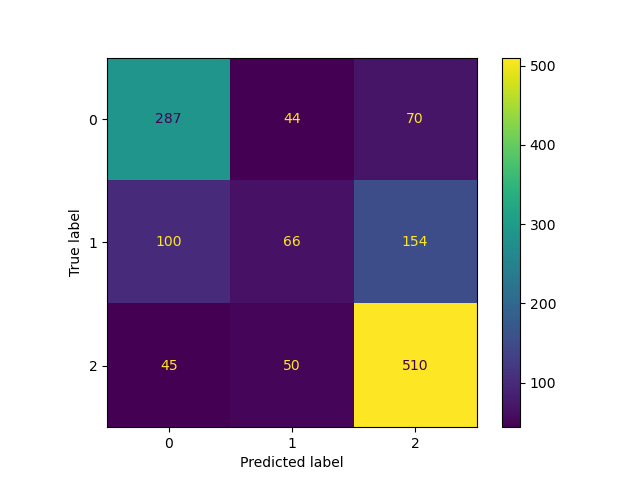

In [27]:
print("\nConfusion Matrix (Decision Tree)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=lr_predicted))

Now, let's put things back into perspective. A predictive performance of 62% is quite fantastic. Plus, we can definitely be rich if we go into betting machine/platform and use our model to identify which team has a higher chance of winning.

However, bear in mind that the input features that we have for our test set composed of the statistics that we can only know after a match has ended, such as the number of shots on target made, the number of yellow cards given, etc.

Hence, in theory, we are not ready yet for putting our model into the real world, and our current model would actually have performed worse when being tested on the real world data

## Preparing our DOXA Submission

Once we are confident with the performance of our model, we can start deploying it on the real test dataset for submission to DOXA! 

In [28]:
# First, let's see the testing set that we have
data_test = pd.read_csv("./data/test.csv")          # Change the path accordingly 

Then, we must preprocess the dataset before feeding it into the trained model. The preprocessing steps include: 
    
1. Converting categorical data into numerical data
2. Dropping the `date` feature

In [29]:
# Encode categorical features using CategoricalEncoder() 
data_test[["home_team", "away_team", "referee", "half_time_result"]] = enc.fit_transform(
    data_test[["home_team", "away_team", "referee", "half_time_result"]]
)

In [30]:
# Drop the date from our test set
data_test.drop(columns=["date"], inplace=True)

Once we have redone all the preprocessing stages, we can proceed to do inference on the DOXA submission test dataset.

In [31]:
labels = target_enc.classes_

In [32]:
labels

array(['A', 'D', 'H'], dtype=object)

In [33]:
# We will choose the logistic regression model
predictions = clf_lr.predict(data_test)

# Let's have a look at the first 20 predictions
predictions[:20]

array([0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2])

In [34]:
# Since we need to provide an output of either 'H', 'D', or 'A', 
# we need to decode back our prediction into its corresponding label
predictions = target_enc.inverse_transform(predictions)

# Let's have a look at the label of the first 20 predictions
predictions[:20]

array(['A', 'H', 'A', 'H', 'A', 'H', 'H', 'H', 'D', 'A', 'H', 'A', 'H',
       'H', 'H', 'H', 'H', 'H', 'A', 'H'], dtype=object)

In [35]:
predictions.shape

(736,)

It seems that the output is the shape it should be, having 736 entries, so we are now ready to submit our predictions. 

In [36]:
os.makedirs("submission", exist_ok=True)

with open("submission/y.txt", "w") as f:
    f.writelines([f"{prediction}\n" for prediction in predictions])

with open("submission/doxa.yaml", "w") as f:
    f.write("competition: epl\nenvironment: cpu\nlanguage: python\nentrypoint: run.py")

with open("submission/run.py", "w") as f:
    f.write("with open('y.txt', 'r') as f: print(f.read().strip())")


## Submitting to DOXA

Before you can submit to DOXA, you must first ensure that you are enrolled for the challenge on the DOXA website. Visit [the challenge page](https://doxaai.com/competition/uclais-1) and click "Enrol" in the top-right corner.

You can then log in using the DOXA CLI by running the following command:

In [ ]:
!doxa login

You can then submit your results to DOXA by running the following command:

In [ ]:
!doxa upload submission

Yay! You have (probably) uploaded your submission to DOXA for the EPL prediction competition! Take a moment to see where you are on the [scoreboard](https://doxaai.com/competition/uclais-3)!

## Possible Improvements

Our model is not that good at predicting stroke since it mainly just outputs 0, so there is definitely scope for improvement! Here are a few ways we could improve the process:

**1. Data Visualisation**
- Visualise other features as well (rather than just shots on target) to see what other features correlate with the chance of a team winning. If the feature that we visualised seems not to have a strong correlation with the chance of winning, we might as well remove it. We could potentially produce a correlation matrix.


**2. Data Preprocessing**
- Apply the [PCA algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), which will reduce the number of input features to a smaller subset that matters more to us. We choose `n` input features that have the highest orthogonality, where `n` is a hyperparameter, so tuning needs to be done to get the best performance.

- Have a look on implementing [Elo rating](https://blog.collegefootballdata.com/talking-tech-elo-ratings/), or maybe try to implement some sort of defense and attack rating for each team which measures how likely a team to score or concede a goal.

- If you want to go further, you can add more data to your model. Perhaps including individual rating attained from [Fantasy Football](https://fantasy.premierleague.com/statistics), or explicity encode the result of last 5 matches for both home and away team? The possibility here is endless.

**3. Model Selection**
- In our example, we have looked at implementing [logistic regression models](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [support vector machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Each of these models has its own set of hyperparameters that you can tune to improve model performance. The link will bring you to the documentation page of `scikit-learn` where you can discover more about the hyperparameters of each type of model.
- On top of that, there are many more machine learning model types that you can try out and see whether accuracy improves or not. Indeed, there are even ensemble methods that use multiple machine learning models under the hood! Why not try implementing [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)?
- If you look at the different machine learning models being imported at the start of the notebook, you will notice that there are quite a few which have not been used. This might be a good starting point!

And perhaps, many more...